In [323]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.types import Integer, Text, String, DateTime
import matplotlib.pyplot as plt
# pd.set_option("display.precision", 1)
import numpy as np
import seaborn as sns
import pandas.io.sql
%matplotlib inline
import pyodbc
from matplotlib.ticker import StrMethodFormatter

In [324]:
df = "data_analyst_assessment.csv"
df = pd.read_csv(df)
df.head()

,Account.Account_ID_18_Characters__c,2010 Sum,2011 Sum,2012 Sum,2013 Sum,2014 Sum,2015 Sum,2016 Sum,2017 Sum
0,0013600000VCRPtAAP,nan,nan,nan,nan,25.0,25.0,25.0,nan
1,0013600000VDLBdAAP,nan,nan,nan,nan,nan,100.0,100.0,50.0
2,0013600000VAfvJAAT,nan,nan,nan,600.0,nan,250.0,250.0,100.0
3,0013600000VDKj4AAH,nan,nan,nan,nan,nan,"1,000.0",450.0,700.0
4,0013600000blHyqAAE,nan,nan,nan,nan,nan,nan,"1,000.0","5,000.0"


In [325]:
total_revenue_df = df.rename(columns={"Account.Account_ID_18_Characters__c": "AccountID",
                                    "2010 Sum": "TR2010",
                                     "2011 Sum": "TR2011",
                                     "2012 Sum": "TR2012",
                                     "2013 Sum": "TR2013",
                                    "2014 Sum": "TR2014",
                                    "2015 Sum": "TR2015",
                                    "2016 Sum": "TR2016",
                                    "2017 Sum": "TR2017"})
total_revenue_df.head()
        

,AccountID,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
0,0013600000VCRPtAAP,nan,nan,nan,nan,25.0,25.0,25.0,nan
1,0013600000VDLBdAAP,nan,nan,nan,nan,nan,100.0,100.0,50.0
2,0013600000VAfvJAAT,nan,nan,nan,600.0,nan,250.0,250.0,100.0
3,0013600000VDKj4AAH,nan,nan,nan,nan,nan,"1,000.0",450.0,700.0
4,0013600000blHyqAAE,nan,nan,nan,nan,nan,nan,"1,000.0","5,000.0"


In [326]:
# total_revenue_df['AccountID'].value_counts(normalize=False)
tr_df_updated = total_revenue_df.groupby('AccountID', as_index=False).sum()
tr_df_updated.head()

,AccountID,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
0,0013600000V973CAAR,"22,780.0","30,345.0","5,100.0",0.0,0.0,0.0,0.0,0.0
1,0013600000V973GAAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"25,000.0"
2,0013600000V973HAAR,0.0,0.0,0.0,0.0,495.17,0.0,0.0,0.0
3,0013600000V973MAAR,0.0,0.0,"1,714,396.2",0.0,0.0,0.0,0.0,0.0
4,0013600000V9744AAB,0.0,0.0,0.0,40.0,0.0,0.0,48.0,0.0


In [328]:
tr_df_sorted = tr_df_updated.sort_values(by='TR2013', ascending=False)
pd.set_option('display.float_format', lambda x:  "{:,}".format(x))
tr_df_sorted.head()

,AccountID,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
68874,0013600000VAxBeAAL,"1,227,518,579.42","1,343,684,737.9899998","2,335,929,628.2700005","2,145,227,374.0100002","1,979,136,648.6499982","2,050,426,097.439998","1,941,337,397.9299994","1,861,123,129.8100019"
231728,0013600000VCtbEAAT,0.0,"59,007,000.0","1,899,495.0","405,795,000.0","27,061,125.0",0.0,"390,000,000.0",0.0
748,0013600000V9B8LAAV,"124,320,676.79000026","3,303,285.799999995","3,310,138.6499999943","386,006,489.4300006","294,362,524.4399998","298,152,000.0","168,771,000.0","101,101,000.0"
17,0013600000V979DAAR,"151,607,480.22","152,933,751.8100003","154,066,963.6800004","161,086,155.29999995","165,943,604.60999998","129,563,782.7399995","146,475,000.0","91,863,450.0"
1069,0013600000V9BtLAAV,"1,337,980.0","2,565,300.0","59,127,650.0","96,523,688.0","164,875,352.0","55,607,766.65999951","100,038,601.7000018","22,171,234.0"


In [330]:
tr_df_sorted.head()
tr_df_sorted.set_index("AccountID", append=False).head()

,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
AccountID,,,,,,,,
0013600000VAxBeAAL,"1,227,518,579.42","1,343,684,737.9899998","2,335,929,628.2700005","2,145,227,374.0100002","1,979,136,648.6499982","2,050,426,097.439998","1,941,337,397.9299994","1,861,123,129.8100019"
0013600000VCtbEAAT,0.0,"59,007,000.0","1,899,495.0","405,795,000.0","27,061,125.0",0.0,"390,000,000.0",0.0
0013600000V9B8LAAV,"124,320,676.79000026","3,303,285.799999995","3,310,138.6499999943","386,006,489.4300006","294,362,524.4399998","298,152,000.0","168,771,000.0","101,101,000.0"
0013600000V979DAAR,"151,607,480.22","152,933,751.8100003","154,066,963.6800004","161,086,155.29999995","165,943,604.60999998","129,563,782.7399995","146,475,000.0","91,863,450.0"
0013600000V9BtLAAV,"1,337,980.0","2,565,300.0","59,127,650.0","96,523,688.0","164,875,352.0","55,607,766.65999951","100,038,601.7000018","22,171,234.0"


In [331]:
# Percent Change per Year
AnnualPctChange = tr_df_sorted[['TR2010','TR2011','TR2012','TR2013','TR2014','TR2015','TR2016','TR2017']].pct_change(axis='columns')

AnnualPctChangeDf = pd.DataFrame(AnnualPctChange)
AnnualPctChangeDf.fillna(0).head()

,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
68874,0.0,0.09463494933403616,0.7384506664593711,-0.08163869833751591,-0.07742336657280968,0.03602047834272959,-0.053202941401398585,-0.04131907632621101
231728,0.0,inf,-0.967808988764045,212.63309721794477,-0.9333133109082172,-1.0,inf,-1.0
748,0.0,-0.9734293129245118,0.0020745555834131846,115.6133900252188,-0.23741560698973618,0.012873498646641002,-0.4339430894308943,-0.40095751047277084
17,0.0,0.008748061692442466,0.007409821943085149,0.04555935583035531,0.03015435622604401,-0.21923003273009645,0.13052426304916454,-0.3728387096774194
1069,0.0,0.9172932330827068,22.04901960784314,0.6324627817949808,0.7081335723516906,-0.6627284431210827,0.7990041267376209,-0.7783732117079402


In [332]:
#Clean the table: replace the inf & nan with zero, round the numbers

AnnualPctChangeDf = AnnualPctChangeDf.replace([np.inf, -np.inf], np.nan)
AnnualPctChangeDf=AnnualPctChangeDf.fillna(0)

AnnualPctChangeDf=pd.DataFrame(AnnualPctChangeDf)
AnnualPctChangeDf.round(decimals=2)

AnnualPctChangeDf.reset_index(drop=True)
AnnualPctChangeDf=AnnualPctChangeDf.round(decimals=2)

In [333]:
#Connect to the SQL Database
connection_string = "postgres:{Password}@localhost:5432/revenue_total_db"
engine = create_engine(f'postgresql://{connection_string}')
conn = engine.connect()

In [334]:
tr_df_sorted.to_sql(name = 'TotalAnnualRevenue', con=engine, if_exists='append', index=False)

In [335]:
AnnualPctChangeDf.to_sql(name = 'AnnualPctChange', con=engine, if_exists='append', index=False)

# Total Revenue 2010-2017

In [336]:
TotalRevenue2010=tr_df_sorted["TR2010"].sum()
TotalRevenue2010

2218970881.5200005

In [337]:
TotalRevenue2011=tr_df_sorted["TR2011"].sum()
TotalRevenue2011

2563089642.15

In [338]:
TotalRevenue2012=tr_df_sorted["TR2012"].sum()
TotalRevenue2012

3646200718.1300035

In [339]:
TotalRevenue2013=tr_df_sorted["TR2013"].sum()
TotalRevenue2013

4179513793.0200024

In [340]:
TotalRevenue2014=tr_df_sorted["TR2014"].sum()
TotalRevenue2014

3789703488.9800005

In [341]:
TotalRevenue2015=tr_df_sorted["TR2015"].sum()
TotalRevenue2015

3996024211.8699903

In [342]:
TotalRevenue2016=tr_df_sorted["TR2016"].sum()
TotalRevenue2016

4153910973.2718406

In [343]:
TotalRevenue2017=tr_df_sorted["TR2017"].sum()
TotalRevenue2017

3653787501.279994

# Percent Change 2010-2017

In [344]:
OverallPctChange2011 = ((TotalRevenue2011-TotalRevenue2010)/TotalRevenue2010)*100
OverallPctChange2011

15.50803408444357

In [345]:
OverallPctChange2012 = ((TotalRevenue2012-TotalRevenue2011)/TotalRevenue2011)*100
OverallPctChange2012

42.25802555510527

In [346]:
OverallPctChange2013 = ((TotalRevenue2013-TotalRevenue2012)/TotalRevenue2012)*100
OverallPctChange2013

14.626541875169034

In [347]:
OverallPctChange2014 = ((TotalRevenue2014-TotalRevenue2013)/TotalRevenue2013)*100
OverallPctChange2014

-9.32669021671862

In [348]:
OverallPctChange2015 = ((TotalRevenue2015-TotalRevenue2014)/TotalRevenue2014)*100
OverallPctChange2015

5.444244476908168

In [349]:
OverallPctChange2016 = ((TotalRevenue2016-TotalRevenue2015)/TotalRevenue2015)*100
OverallPctChange2016

3.9510962154046885

In [350]:
OverallPctChange2017= ((TotalRevenue2017-TotalRevenue2016)/TotalRevenue2016)*100
OverallPctChange2017

-12.039821633392465

# Table representing the total revenue amounts  

In [351]:
RevenueAnnualDifference = pd.DataFrame({"TR2010":[TotalRevenue2010],
                                  "TR2011": [TotalRevenue2011],
                                  "TR2012": [TotalRevenue2012],
                                  "TR2013": [TotalRevenue2013],
                                  "TR2014": [TotalRevenue2014],
                                    "TR2015": [TotalRevenue2015],
                                  "TR2016": [TotalRevenue2016],
                                    "TR2017": [TotalRevenue2017]})


In [352]:

idx_rename = {0:'Total Revenue'}
RevenueAnnualDifference = RevenueAnnualDifference.rename(index=idx_rename)
RevenueAnnualDifference

,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
Total Revenue,"2,218,970,881.5200005","2,563,089,642.15","3,646,200,718.1300035","4,179,513,793.0200024","3,789,703,488.9800005","3,996,024,211.8699903","4,153,910,973.2718406","3,653,787,501.279994"


In [353]:
RevenueAnnualDifference_t = RevenueAnnualDifference.transpose()
RevenueAnnualDifference_t.round(decimals=0)

,Total Revenue
TR2010,"2,218,970,882.0"
TR2011,"2,563,089,642.0"
TR2012,"3,646,200,718.0"
TR2013,"4,179,513,793.0"
TR2014,"3,789,703,489.0"
TR2015,"3,996,024,212.0"
TR2016,"4,153,910,973.0"
TR2017,"3,653,787,501.0"


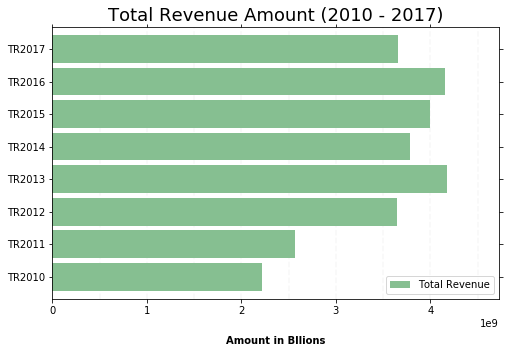

In [354]:
ax = RevenueAnnualDifference_t.plot(kind='barh', figsize=(8,5), color= '#86bf91', zorder=2, width=0.85)
ax.set_alpha(0.8)
ax.set_title("Total Revenue Amount (2010 - 2017)", fontsize=18)
ax.set_xlabel("Amount in Bllions", labelpad=20, weight='bold', size=10);

# ax.set_xticks([1000000000,2000000000,3000000000,4000000000])

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   



# ax.set_ylabel("Neighbourhoods", labelpad=20, weight='bold', size=10)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
# ax.invert_yaxis()


# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()+.6, i.get_y()+.45, \
#             str(round(i.get_width())*100)+'$', fontsize=12,fontweight='bold',
# color='dimgrey')
    



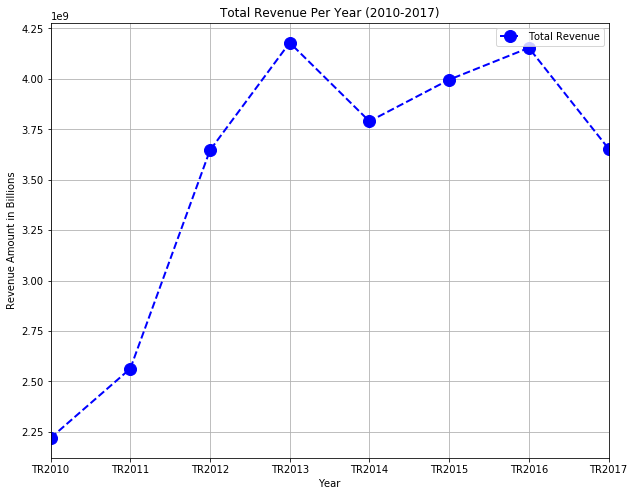

In [355]:
RevenuePlot= RevenueAnnualDifference_t.plot(figsize=(10,8), color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel("Year")
plt.title('Total Revenue Per Year (2010-2017)')
plt.ylabel("Revenue Amount in Billions")
plt.grid()
plt.show()

# Percent Change Visualization

In [356]:
PctChangeSummary = pd.DataFrame({"TR2010":[0],
                                  "TR2011": [ OverallPctChange2011],
                                  "TR2012": [ OverallPctChange2012],
                                  "TR2013": [OverallPctChange2013],
                                  "TR2014": [OverallPctChange2014],
                                    "TR2015": [OverallPctChange2015],
                                  "TR2016": [OverallPctChange2016],
                                    "TR2017": [OverallPctChange2017]})

idx_rename = {0:'Percent Change'} 
PctChangeSummary = PctChangeSummary.rename(index=idx_rename)
PctChangeSummary
PctChange_t = PctChangeSummary.transpose()
PctChange_t.round(decimals=2)

,Percent Change
TR2010,0.0
TR2011,15.51
TR2012,42.26
TR2013,14.63
TR2014,-9.33
TR2015,5.44
TR2016,3.95
TR2017,-12.04


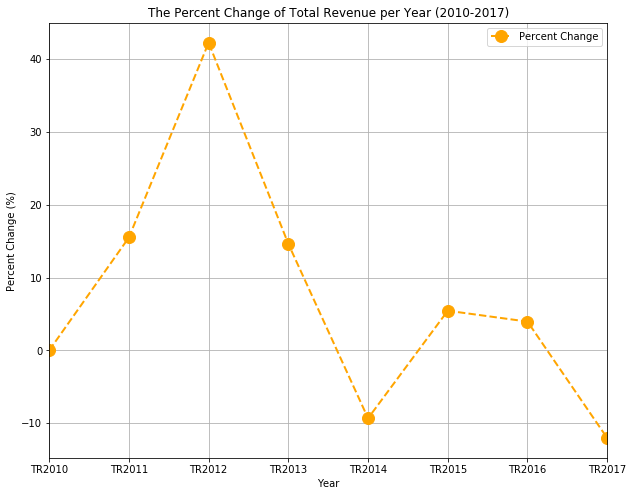

In [450]:
PctChange_t.plot.line(figsize=(10,8), color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel("Year")
plt.title('The Percent Change of Total Revenue per Year (2010-2017)')
plt.ylabel("Percent Change (%)")
plt.grid()

# Gift Sizes Binned by Amounts


In [461]:
RevenueBins = [-1,0,1000,2500,50000000000]
labels = ["0","1000","1000-2500","<500B"]

In [462]:
TotalRevenueCopyDF = tr_df_sorted.copy()
TotalRevenueCopyDF.round(decimals=2).head()

,AccountID,TR2010,TR2011,TR2012,TR2013,TR2014,TR2015,TR2016,TR2017
68874,0013600000VAxBeAAL,"1,227,518,579.42","1,343,684,737.99","2,335,929,628.27","2,145,227,374.01","1,979,136,648.65","2,050,426,097.44","1,941,337,397.93","1,861,123,129.81"
231728,0013600000VCtbEAAT,0.0,"59,007,000.0","1,899,495.0","405,795,000.0","27,061,125.0",0.0,"390,000,000.0",0.0
748,0013600000V9B8LAAV,"124,320,676.79","3,303,285.8","3,310,138.65","386,006,489.43","294,362,524.44","298,152,000.0","168,771,000.0","101,101,000.0"
17,0013600000V979DAAR,"151,607,480.22","152,933,751.81","154,066,963.68","161,086,155.3","165,943,604.61","129,563,782.74","146,475,000.0","91,863,450.0"
1069,0013600000V9BtLAAV,"1,337,980.0","2,565,300.0","59,127,650.0","96,523,688.0","164,875,352.0","55,607,766.66","100,038,601.7","22,171,234.0"


In [463]:
TotalRevenueCopyDF["Gift Size 2010"]= pd.cut(TotalRevenueCopyDF["TR2010"], RevenueBins, labels=labels)
GiftSizes2010=TotalRevenueCopyDF["Gift Size 2010"].value_counts()
GiftSizes2010

0            355720
1000          41702
<500B          3816
1000-2500      2590
Name: Gift Size 2010, dtype: int64

In [464]:
TotalRevenueCopyDF["Gift Size 2011"]= pd.cut(TotalRevenueCopyDF["TR2011"], RevenueBins, labels=labels )
GiftSizes2011=TotalRevenueCopyDF["Gift Size 2011"].value_counts()
GiftSizes2011

0            352135
1000          44879
<500B          4063
1000-2500      2751
Name: Gift Size 2011, dtype: int64

In [465]:
TotalRevenueCopyDF["Gift Size 2012"]= pd.cut(TotalRevenueCopyDF["TR2012"], RevenueBins, labels=labels )
GiftSizes2012=TotalRevenueCopyDF["Gift Size 2012"].value_counts()
GiftSizes2012

0            346365
1000          49939
<500B          4542
1000-2500      2982
Name: Gift Size 2012, dtype: int64

In [466]:
TotalRevenueCopyDF["Gift Size 2013"]= pd.cut(TotalRevenueCopyDF["TR2013"], RevenueBins, labels=labels )
GiftSizes2013=TotalRevenueCopyDF["Gift Size 2013"].value_counts()
GiftSizes2013

0            347788
1000          48457
<500B          4451
1000-2500      3132
Name: Gift Size 2013, dtype: int64

In [467]:
TotalRevenueCopyDF["Gift Size 2014"]= pd.cut(TotalRevenueCopyDF["TR2014"], RevenueBins, labels=labels )
GiftSizes2014=TotalRevenueCopyDF["Gift Size 2014"].value_counts()
GiftSizes2014

0            337871
1000          57288
<500B          5185
1000-2500      3484
Name: Gift Size 2014, dtype: int64

In [468]:
TotalRevenueCopyDF["Gift Size 2015"]= pd.cut(TotalRevenueCopyDF["TR2015"], RevenueBins, labels=labels )
GiftSizes2015=TotalRevenueCopyDF["Gift Size 2015"].value_counts()
GiftSizes2015

0            326014
1000          68342
<500B          5679
1000-2500      3793
Name: Gift Size 2015, dtype: int64

In [469]:
TotalRevenueCopyDF["Gift Size 2016"]= pd.cut(TotalRevenueCopyDF["TR2016"], RevenueBins, labels=labels )
GiftSizes2016=TotalRevenueCopyDF["Gift Size 2016"].value_counts()
GiftSizes2016

0            319406
1000          74907
<500B          5690
1000-2500      3825
Name: Gift Size 2016, dtype: int64

In [470]:
TotalRevenueCopyDF["Gift Size 2017"]= pd.cut(TotalRevenueCopyDF["TR2017"], RevenueBins, labels=labels )
GiftSizes2017=TotalRevenueCopyDF["Gift Size 2017"].value_counts()

# GiftSizeCount = [GiftSizes2010,GiftSizes2011,GiftSizes2012,GiftSizes2013,GiftSizes2014,GiftSizes2015,GiftSizes2016,GiftSizes2017]
GiftSizeCount = pd.DataFrame({
                            "Gift Size 2010": GiftSizes2010,
                             "Gift Size 2011": GiftSizes2011,
                            "Gift Size 2012": GiftSizes2012,
                             "Gift Size 2013": GiftSizes2013,
                             "Gift Size 2014": GiftSizes2014,
                             "Gift Size 2015": GiftSizes2015,
                             "Gift Size 2016": GiftSizes2016,
                             "Gift Size 2017": GiftSizes2017,
})

GiftSizeCount


,Gift Size 2010,Gift Size 2011,Gift Size 2012,Gift Size 2013,Gift Size 2014,Gift Size 2015,Gift Size 2016,Gift Size 2017
0,355720,352135,346365,347788,337871,326014,319406,311537
1000,41702,44879,49939,48457,57288,68342,74907,83377
<500B,3816,4063,4542,4451,5185,5679,5690,5356
1000-2500,2590,2751,2982,3132,3484,3793,3825,3558


# Number of Donations Per Year

In [471]:
RevenueGroupB = pd.read_sql("SELECT * FROM public.revenue_total_db",conn)
RevenueGroupB.head()

,account_id,tr_2010,tr_2011,tr_2012,tr_2013,tr_2014,tr_2015,tr_2016,tr_2017
0,0013600000VCRPtAAP,nan,nan,nan,nan,25.0,25.0,25.0,nan
1,0013600000VDLBdAAP,nan,nan,nan,nan,nan,100.0,100.0,50.0
2,0013600000VAfvJAAT,nan,nan,nan,600.0,nan,250.0,250.0,100.0
3,0013600000VDKj4AAH,nan,nan,nan,nan,nan,"1,000.0",450.0,700.0
4,0013600000blHyqAAE,nan,nan,nan,nan,nan,nan,"1,000.0","5,000.0"


In [472]:
RevenueGroupA = pd.read_sql("SELECT * FROM revenue_total",conn)
RevenueGroupA.head()

,account_id,tr_2010,tr_2011,tr_2012,tr_2013,tr_2014,tr_2015,tr_2016,tr_2017
0,0013600000V973CAAR,"22,780.0","30,345.0","5,100.0",0.0,0.0,0.0,0.0,0.0
1,0013600000V973GAAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"25,000.0"
2,0013600000V973HAAR,0.0,0.0,0.0,0.0,495.17,0.0,0.0,0.0
3,0013600000V973MAAR,0.0,0.0,"1,714,396.2",0.0,0.0,0.0,0.0,0.0
4,0013600000V9744AAB,0.0,0.0,0.0,40.0,0.0,0.0,48.0,0.0


In [473]:
# Total number of donors per year 
totaldonors= RevenueGroupA["account_id"].count()
totaldonors


403828

In [474]:
#Total number of donations per year
DonationsCount2010=RevenueGroupA['tr_2010'].astype(bool).sum(axis=0)

DonationsCount2010

48108

In [475]:
DonationsCount2011=RevenueGroupA['tr_2011'].astype(bool).sum(axis=0)
DonationsCount2011

51693

In [476]:
DonationsCount2012=RevenueGroupA['tr_2012'].astype(bool).sum(axis=0)
DonationsCount2012

57463

In [477]:
DonationsCount2013=RevenueGroupA['tr_2013'].astype(bool).sum(axis=0)
DonationsCount2013

56040

In [478]:
DonationsCount2014=RevenueGroupA['tr_2014'].astype(bool).sum(axis=0)
DonationsCount2014

65957

In [479]:
DonationsCount2015=RevenueGroupA['tr_2015'].astype(bool).sum(axis=0)
DonationsCount2015

77814

In [480]:
DonationsCount2016=RevenueGroupA['tr_2016'].astype(bool).sum(axis=0)
DonationsCount2016

84422

In [481]:
DonationsCount2017=RevenueGroupA['tr_2017'].astype(bool).sum(axis=0)
DonationsCount2017

92291

In [482]:
Index = ['Total Number of Donations']
DonationsCountAll = pd.DataFrame({
                            "YR2010": DonationsCount2010,
                             "YR2011": DonationsCount2011,
                           "YR2012": DonationsCount2012,
                             "YR2013": DonationsCount2013,
                             "YR2014": DonationsCount2014,
                             "YR2015": DonationsCount2015,
                             "YR2016": DonationsCount2016,
                             "YR2017": DonationsCount2017
}, index=[Index])

DonationsCountAll


,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017
Total Number of Donations,48108,51693,57463,56040,65957,77814,84422,92291


# Customer Retention Rate


In [483]:
CustomerRetention2011=(((DonationsCount2011-(DonationsCount2011-DonationsCount2010))/totaldonors))*100
CustomerRetention2011

11.912992660241489

In [484]:
CustomerRetention2012=(((DonationsCount2012-(DonationsCount2012-DonationsCount2011))/totaldonors))*100
CustomerRetention2012

12.800746852620422

In [485]:
CustomerRetention2013=(((DonationsCount2013-(DonationsCount2013-DonationsCount2012))/totaldonors))*100
CustomerRetention2013

14.229572986519013

In [486]:
CustomerRetention2014=(((DonationsCount2014-(DonationsCount2014-DonationsCount2013))/totaldonors))*100
CustomerRetention2014

13.877195241538477

In [487]:
CustomerRetention2015=(((DonationsCount2015-(DonationsCount2015-DonationsCount2014))/totaldonors))*100
CustomerRetention2015

16.33294372851808

In [488]:
CustomerRetention2016=(((DonationsCount2016-(DonationsCount2016-DonationsCount2015))/totaldonors))*100
CustomerRetention2016

19.26909476311697

In [489]:
CustomerRetention2017=(((DonationsCount2017-(DonationsCount2017-DonationsCount2016))/totaldonors))*100
CustomerRetention2017

20.905434987172757

In [490]:
Index = ['Rate (%)']
DonationsCountAll = pd.DataFrame({
                            "YR2010": 0,
                             "YR2011": CustomerRetention2011,
                           "YR2012": CustomerRetention2012,
                             "YR2013": CustomerRetention2013,
                             "YR2014": CustomerRetention2014,
                             "YR2015": CustomerRetention2015,
                             "YR2016": CustomerRetention2016,
                             "YR2017": CustomerRetention2017
}, index=[Index])

DonationsCountAll.round(decimals=2)

,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017
Rate (%),0,11.91,12.8,14.23,13.88,16.33,19.27,20.91


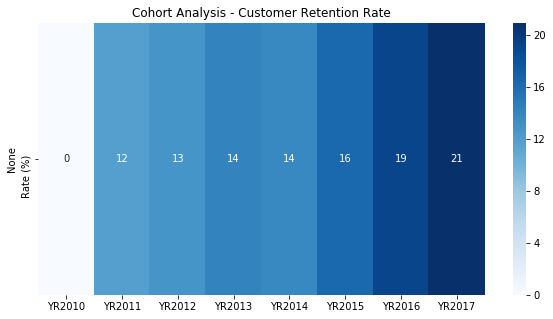

<Figure size 432x288 with 0 Axes>

In [491]:
plt.figure(figsize = (10,5))
plt.title('Cohort Analysis - Customer Retention Rate')
sns.heatmap(data = DonationsCountAll,
            annot = True, 
            cmap = "Blues")
plt.show()

plt.savefig('Cohort Analysis - Customer Retention Rate.png')

# Dollar Retention Rate

In [492]:
RetentionRate2011 = ((TotalRevenue2011 - TotalRevenue2010)/TotalRevenue2010)*100
RetentionRate2011

15.50803408444357

In [438]:
RetentionRate2012 = ((TotalRevenue2012 - TotalRevenue2011)/TotalRevenue2011)*100
RetentionRate2012

42.25802555510527

In [439]:
RetentionRate2013 = ((TotalRevenue2013 - TotalRevenue2012)/TotalRevenue2012)*100
RetentionRate2013

14.626541875169034

In [440]:
RetentionRate2014 = ((TotalRevenue2014 - TotalRevenue2013)/TotalRevenue2013)*100
RetentionRate2014

-9.32669021671862

In [441]:
RetentionRate2015 = ((TotalRevenue2015 - TotalRevenue2014)/TotalRevenue2014)*100
RetentionRate2015

5.444244476908168

In [442]:
RetentionRate2016 = (((TotalRevenue2016 - TotalRevenue2015))/TotalRevenue2015)*100
RetentionRate2016

3.9510962154046885

In [443]:
RetentionRate2017 = ((TotalRevenue2017 - TotalRevenue2016)/TotalRevenue2016)*100
RetentionRate2017

-12.039821633392465

In [444]:
Index = [ 'Rate (%)']
RetentionRate = pd.DataFrame({
                            "YR2010": [0],
                             "YR2011": [RetentionRate2011],
                           "YR2012": [RetentionRate2012],
                             "YR2013": [RetentionRate2013],
                             "YR2014": [RetentionRate2014],
                             "YR2015": [RetentionRate2015],
                             "YR2016": [RetentionRate2016],
                             "YR2017": [RetentionRate2017],
}, index=[Index])


RetentionRate.round(decimals=2)

,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017
Rate (%),0,15.51,42.26,14.63,-9.33,5.44,3.95,-12.04


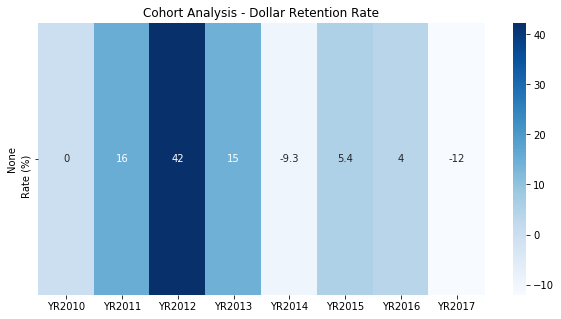

<Figure size 432x288 with 0 Axes>

In [445]:
plt.figure(figsize = (10,5))
plt.title('Cohort Analysis - Dollar Retention Rate')
sns.heatmap(data = RetentionRate, 
            annot = True, 
            cmap = "Blues")
plt.show()
plt.savefig("Cohort Analysis - Dollar Retention Rate.png")

In [446]:
#Summary of Accounts that continued to lower their amount with every annual donation

revenueinc2013_2017 = pd.read_sql("SELECT * FROM revenueinc2013_2017",conn)
revenueinc2013_2017.head()

,account_id,tr_2013,tr_2014,tr_2015,tr_2016,tr_2017
0,0013600000VCKeuAAH,"1,000.0","1,000.0","1,000.0","1,000.0","1,000.0"
1,0013600000VAMdTAAX,"2,000.0","2,000.0","2,000.0","2,000.0","2,000.0"
2,0013600000VAMeOAAX,"2,000.0","2,000.0","2,000.0","2,300.0","2,800.0"
3,0013600000VAdNIAA1,"3,000.0","3,500.0","3,500.0","4,000.0","4,000.0"
4,0013600000VAPYaAAP,"1,502.39","1,523.55","1,617.42","2,027.6","2,180.7"


In [447]:
#Summary of Accounts that continued to donate a higher amount compared to the previous year

revenueInc2013_2017=revenueinc2013_2017.describe()
revenueInc2013_2017.round(decimals=2)

,tr_2013,tr_2014,tr_2015,tr_2016,tr_2017
count,"2,279.0","2,279.0","2,279.0","2,279.0","2,279.0"
mean,"46,675.22","52,982.91","72,825.31","79,130.06","114,649.1"
std,"157,235.46","167,470.59","235,621.4","252,034.72","465,522.42"
min,"1,000.0","1,000.0","1,000.0","1,000.0","1,000.0"
25%,"1,000.0","1,000.0","1,000.0","1,200.0","1,500.0"
50%,"2,000.0","2,500.0","3,000.0","3,000.0","3,000.0"
75%,"5,000.0","9,211.0","10,000.0","10,000.0","15,000.0"
max,"1,100,000.0","1,100,000.0","1,108,340.0","1,197,500.0","4,100,000.0"
